<a href="https://colab.research.google.com/github/pranavmp-10-000/TrafficSignRecognition/blob/main/TrafficSignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pranavmp-10-000/TrafficSignRecognition.git

Cloning into 'TrafficSignRecognition'...
remote: Enumerating objects: 2473, done.
remote: Counting objects: 100% (2473/2473), done.
remote: Compressing objects: 100% (2471/2471), done.
remote: Total 2473 (delta 0), reused 2469 (delta 0), pack-reused 0
Receiving objects: 100% (2473/2473), 75.94 MiB | 53.56 MiB/s, done.


In [2]:
cd TrafficSignRecognition

/content/TrafficSignRecognition


In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

In [5]:
files_list = os.listdir('TSRD-Train')

In [11]:
classes = [i[:i.find('_')] for i in files_list]

In [20]:
train_dataset = pd.DataFrame(np.array([files_list,classes]).T,columns=['filename','class'])

In [21]:
train_dataset.head()

,filename,class
0,043_1_0017.png,043
1,024_0031.png,024
2,011_0001.png,011
3,056_0002.png,056
4,004_0026.png,004


In [32]:
class_count = train_dataset.groupby(['class']).count().reset_index()

In [33]:
class_count.head()

,class,filename
0,000,118
1,001,40
2,002,80
3,003,260
4,004,98


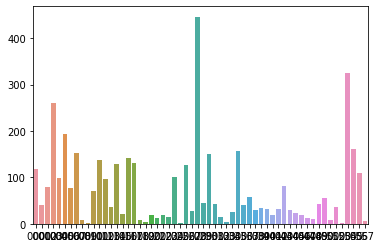

In [40]:
sns.barplot(x=class_count['class'].values,y=class_count['filename'].values)

In [56]:
for i in class_count['class'].values:
  os.mkdir('/content/train/'+str(i))
  for j in train_dataset[train_dataset['class']==i].filename.values:
    shutil.copy('/content/TrafficSignRecognition/TSRD-Train/'+j,'/content/train/'+str(i)+'/'+j)

#Tensorflow ML

## Pre-processing

In [62]:
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.3,
      rescale=1./255, validation_split=.1,
      )
train_generator = datagen_train.flow_from_directory(
    '/content/train/',target_size=(256,256), shuffle=True,subset='training',class_mode='sparse',seed=10)

Found 3776 images belonging to 59 classes.


In [70]:
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
      horizontal_flip=True,
      #width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.3,
      rescale=1./255, validation_split=.1,
      )
val_generator = datagen_train.flow_from_directory(
    '/content/train/',target_size=(256,256), shuffle=True,subset='validation',class_mode='sparse',seed=10)

Found 394 images belonging to 59 classes.


## Model

In [64]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(256,256,3)),
                             tf.keras.layers.Conv2D(256,3,activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(128,3,activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(64,3,activation='relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(256,activation='relu'),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(59,activation='softmax'),
])

In [67]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit(train_generator,epochs=10,batch_size=32,validation_data=val_generator)

Epoch 1/10
118/118 [==============================] - 68s 573ms/step - loss: 1.2774 - accuracy: 0.5834 - val_loss: 1.4627 - val_accuracy: 0.5178
Epoch 2/10
118/118 [==============================] - 67s 567ms/step - loss: 1.2337 - accuracy: 0.6043 - val_loss: 1.2980 - val_accuracy: 0.5635
Epoch 3/10
118/118 [==============================] - 67s 564ms/step - loss: 1.1500 - accuracy: 0.6284 - val_loss: 1.4024 - val_accuracy: 0.5279
Epoch 4/10
118/118 [==============================] - 67s 567ms/step - loss: 1.1418 - accuracy: 0.6255 - val_loss: 1.2481 - val_accuracy: 0.5838
Epoch 5/10
118/118 [==============================] - 67s 565ms/step - loss: 1.0565 - accuracy: 0.6467 - val_loss: 1.1769 - val_accuracy: 0.5990
Epoch 6/10
118/118 [==============================] - 67s 566ms/step - loss: 0.9735 - accuracy: 0.6751 - val_loss: 1.1789 - val_accuracy: 0.5787
Epoch 7/10
118/118 [==============================] - 67s 566ms/step - loss: 0.9378 - accuracy: 0.6915 - val_loss: 1.2158 - val_ac

In [74]:
model.save('./model_custom.h5')